In [1]:
from metrics import Distance
from matplotlib import pyplot as plt
from mlflux.eval import heatmap, annotate_heatmap
from metrics import Stoch
import numpy as np
%load_ext autoreload
%autoreload 3

In [2]:
dir = '/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01/'
years = (2011,2012,2015,2016)
num1 = {'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
num2 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
num3 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 60}
num4 = {'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
num5 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 10}
num6 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 60}

In [3]:
# MLD is absolute signed so always positive
# So a negative bias is shallower
bias1 = Distance (years, combo=num4, combo_ref=num1, dir=dir)
bias1.read_compute()
bias2 = Distance (years, combo=num5, combo_ref=num2, dir=dir)
bias2.read_compute()
bias3 = Distance (years, combo=num6, combo_ref=num3, dir=dir)
bias3.read_compute()

Compare between 
{'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}


FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01/out_kepsilon_dt10_2011/out_bulk.nc'

In [4]:
stoch1 = Stoch(years, num4, dir)
stoch1.read_compute()
stoch2 = Stoch(years, num5, dir)
stoch2.read_compute()

2011


FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01/out_kepsilon_dt10_2011/out_ensem_mean.nc'

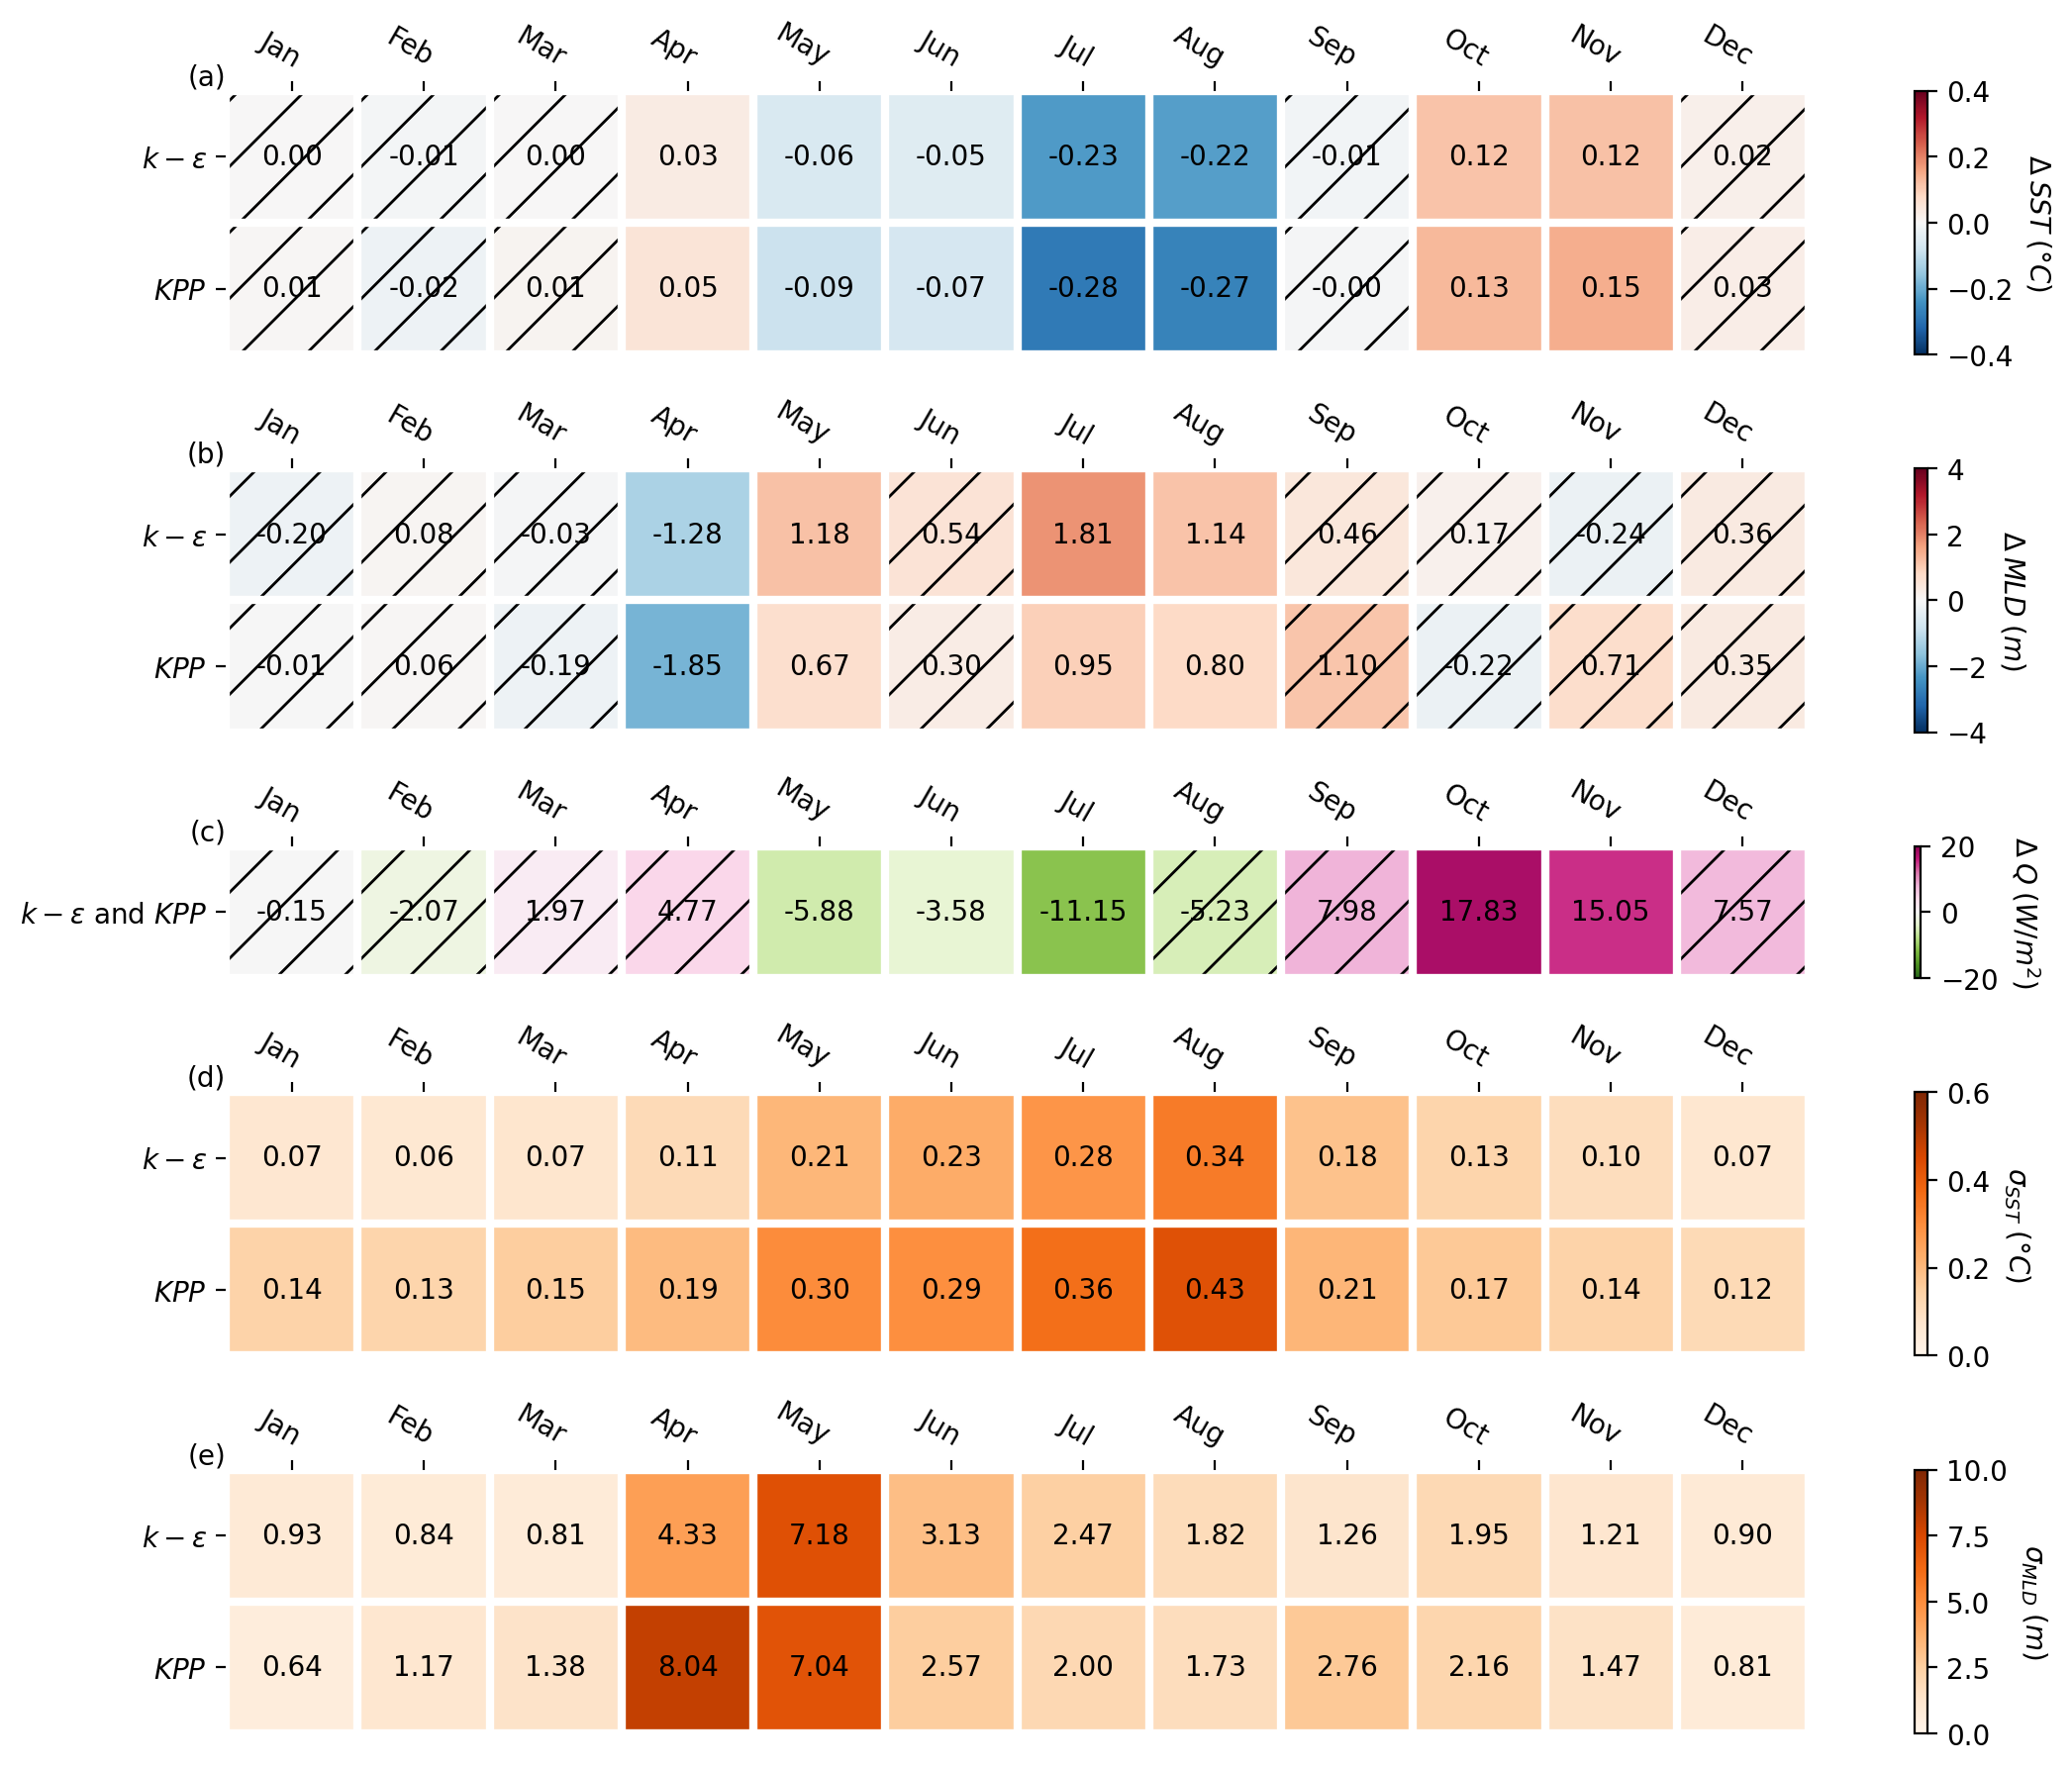

In [5]:
# Together 
fig, axes = plt.subplots(5, 1, figsize=[12,9], dpi=200, height_ratios=[2,2,1,2,2], sharex=True)
biases = [bias1, bias2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# Q
row_labels = ['$k-\epsilon$ and $KPP$']
ax = axes[2]; option = 'Q_diffs' 
yaver_bias = getattr(bias1, option).mean(axis=0) 
sign_agree = bias1.checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

########## Stochastic ###########
stochs = [stoch1, stoch2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# SST spread
ax = axes[3]; option = 'SST_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=0.6, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{SST} \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

# MLD spread
ax = axes[4]; option = 'MLD_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=10, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{MLD} \; (m)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

flabels = ['(a)','(b)','(c)','(d)','(e)']
for i in range(len(axes)):
    axes[i].text(0., 1., flabels[i], transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f'../plots/heatmap_together.png', bbox_inches='tight')

In [ ]:
row_labels = ['$k-\epsilon$ and $KPP$']
ax = axes[2]; option = 'Q_diffs' 
yaver_bias = getattr(bias1, option).mean(axis=0) 
sign_agree = bias1.checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

In [2]:
dir = '/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01/'
years = (2011,2012,2015,2016)

from mlflux.gotm import read_vars
file_ann = {'filename':'heatflux_ann_mean.dat', 'columns':['Q']} 
file_bulk = {'filename':'heatflux_bulk.dat', 'columns':['Qb']}

files = [file_ann, file_bulk]
df = read_vars (path=dir, files=files, datetimeformat='%Y-%m-%d %H:%M:%S')

In [ ]:
ds = df.set_index('datetime').to_xarray()
ds

<xarray.Dataset>
Dimensions:   (datetime: 78912)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2011-01-01 ... 2020-01-01T23:00:00
Data variables:
    Q         (datetime) float64 -82.54 -69.52 -90.77 ... -285.2 -284.8 -238.6
    Qb        (datetime) float64 -75.05 -63.44 -89.84 ... -288.5 -294.2 -259.0

In [ ]:
Q_diffs = []
for year in years:
    ds_ = ds.where(ds.datetime.dt.year == year, drop=True)
    Q_diff = ds_.Q.resample(datetime='1M').mean() - ds_.Qb.resample(datetime='1M').mean()  
    Q_diffs.append(Q_diff)
Q_diff = np.array(Q_diff)

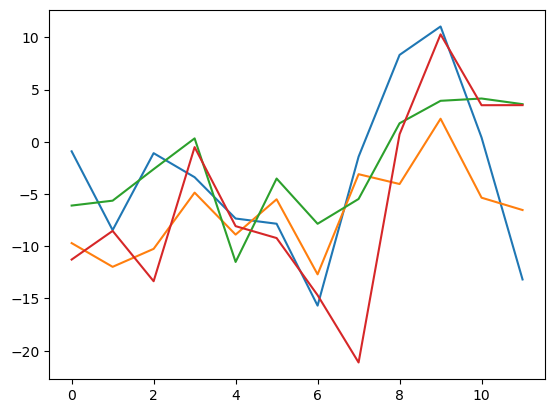

In [15]:
plt.plot(Q_diffs[0])
plt.plot(Q_diffs[1])
plt.plot(Q_diffs[2])
plt.plot(Q_diffs[3])